In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/Chronic_Kidney_Dsease_data.csv')

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [5]:
df.tail()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential
1658,1659,34,1,1,0,0,19.253258,1,11.396510,7.446314,...,9.293499,82.314878,0,0,0,1.754852,0.186400,4.553608,1,Confidential


In [6]:
col_drop = ['PatientID','DoctorInCharge']
df = df.drop(columns=col_drop)

In [15]:
df

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,...,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0
1655,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,...,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0
1656,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,...,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0
1657,90,0,0,2,2,24.964149,0,12.967462,0.618614,4.557577,...,0.257814,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1


In [7]:
print(df.isna().sum())

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

In [8]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease',
       'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
       'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
       'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'Medi

In [10]:
# Separate features and target
X = df.drop(columns=['Diagnosis'])  # Assuming 'Diagnosis' is the target
y = df['Diagnosis']

In [13]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:

print("Data Preprocessing Complete!")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Data Preprocessing Complete!
Shape of X_train: (1327, 51)
Shape of X_test: (332, 51)


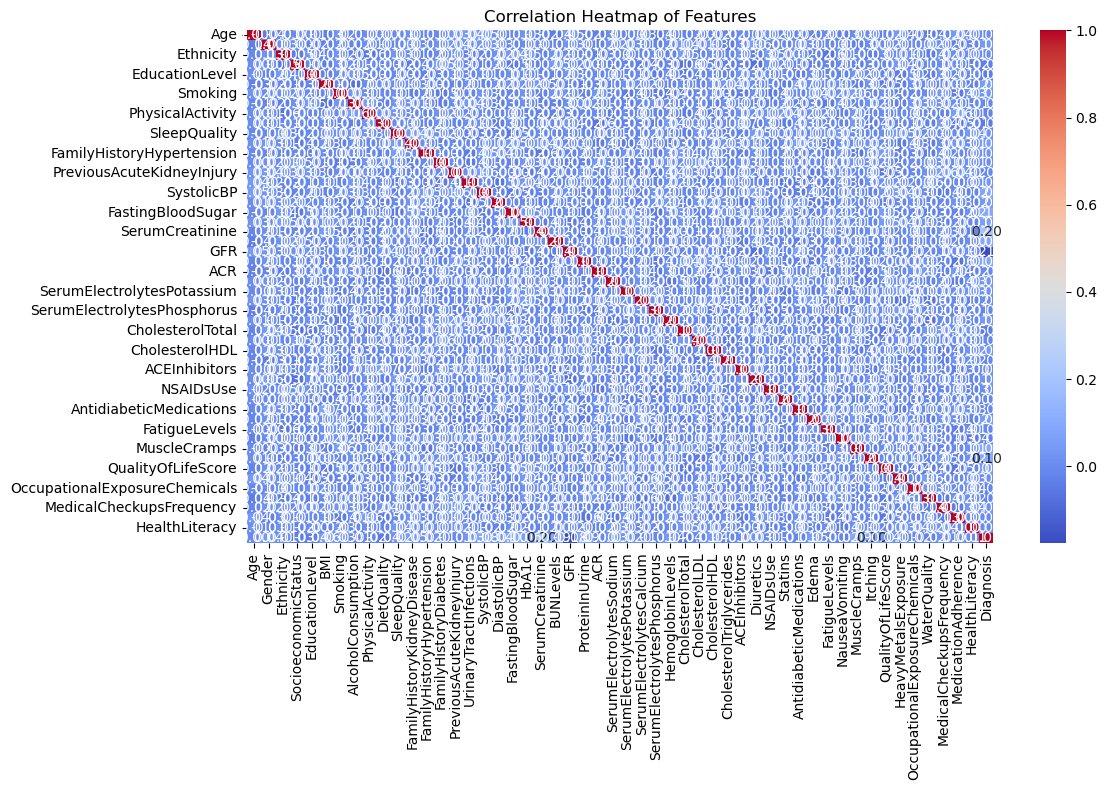

In [17]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

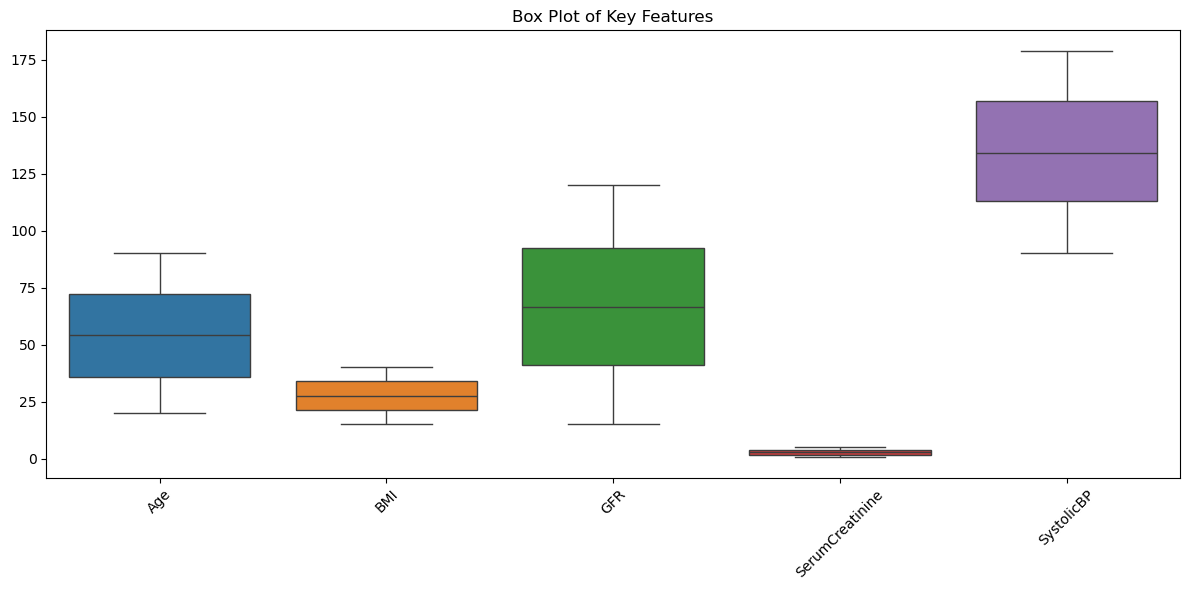

In [19]:
# Box Plot for key features
key_features = ['Age', 'BMI', 'GFR', 'SerumCreatinine', 'SystolicBP']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[key_features])
plt.title('Box Plot of Key Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [23]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

# Select the best model (e.g., highest accuracy)
best_model = max(models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test)))[0]
print(f"Best Model: {best_model}")

Logistic Regression Accuracy: 0.9367
Random Forest Accuracy: 0.9307
SVM Accuracy: 0.9277
XGBoost Accuracy: 0.9398
Best Model: XGBoost


In [24]:
# Assuming Random Forest is the best model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Get feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

In [26]:
# Select top 10 features
top_features = feature_importance.head(10)['feature'].tolist()
X_reduced = X[top_features]

print("Top 10 Features:", top_features)

Top 10 Features: ['SerumCreatinine', 'GFR', 'ProteinInUrine', 'Itching', 'MuscleCramps', 'SerumElectrolytesSodium', 'BUNLevels', 'FastingBloodSugar', 'HbA1c', 'SerumElectrolytesPhosphorus']


In [27]:

# Recreate X_train, X_test with reduced features
X_reduced_scaled = scaler.fit_transform(X_reduced)
X_train_reduced, X_test_reduced, _, _ = train_test_split(X_reduced_scaled, y, test_size=0.2, random_state=42)


In [28]:
# Retrain the best model with reduced features
rf_model.fit(X_train_reduced, y_train)
y_pred_reduced = rf_model.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy with Reduced Features: {accuracy_reduced:.4f}")

Accuracy with Reduced Features: 0.9337


In [30]:
import pickle

with open("Chronic_Kidney_Dsease_.pkl", "wb") as file:
    pickle.dump(rf_model, file)
